# GUI and API

## tkinker

https://docs.python.org/3/library/tkinter.html#module-tkinter 

The tkinter package (“Tk interface”) is the standard Python interface to the Tcl/Tk GUI toolkit. Both Tk and tkinter are available on most Unix platforms, including macOS, as well as on Windows systems.

Running "python -m tkinter" from the command line should open a window demonstrating a simple Tk interface, letting you know that tkinter is properly installed on your system, and also showing what version of Tcl/Tk is installed, so you can read the Tcl/Tk documentation specific to that version.

In [6]:
!python -m tkinter 

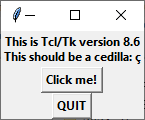

## A Hello World Program

We’ll start by walking through a “Hello World” application in Tkinter. This isn’t the smallest one we could write, but has enough to illustrate some key concepts you’ll need to know


In [5]:
from tkinter import *
from tkinter import ttk
root = Tk()
frm = ttk.Frame(root, padding=10)
frm.grid()
ttk.Label(frm, text="Hello World!").grid(column=0, row=0)
ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)
root.mainloop()

After the imports, the next line creates an instance of the Tk class, which initializes Tk and creates its associated Tcl interpreter. It also creates a toplevel window, known as the root window, which serves as the main window of the application.
The following line creates a frame widget, which in this case will contain a label and a button we’ll create next. The frame is fit inside the root window.

The next line creates a label widget holding a static text string. The grid() method is used to specify the relative layout (position) of the label within its containing frame widget, similar to how tables in HTML work.
A button widget is then created, and placed to the right of the label. When pressed, it will call the destroy() method of the root window.
Finally, the mainloop() method puts everything on the display, and responds to user input until the program terminates.


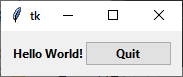

Example of opening a file and printing its contents (there are examples of layout, saving, widgets)

https://www.geeksforgeeks.org/python-askopenfile-function-in-tkinter/


In [ ]:
# importing tkinter and tkinter.ttk
# and all their functions and classes
from tkinter import *
from tkinter.ttk import *

# importing askopenfile function
# from class filedialog
from tkinter.filedialog import askopenfile

root = Tk()
root.geometry('200x100')

# This function will be used to open
# file in read mode and only Python files
# will be opened
def open_file():
	file = askopenfile(mode ='r', filetypes =[('Python Files', '*.py')])
	if file is not None:
		content = file.read()
		print(content)

btn = Button(root, text ='Open', command = lambda:open_file())
btn.pack(side = TOP, pady = 10)

mainloop()


import ipdb
values = [10, 6, 17, 0, 9, 21] 
for value in values:
    breakpoint()
    print(10 / value)
    if value % 5 == 0:
        print('Divisible by 5')
    print('Hello World')


## Tkinter Open File Dialog

https://www.pythontutorial.net/tkinter/tkinter-open-file-dialog/

Open 1 or more files (then the list of files in a tuple).

An example of outputting an open file to the screen - not to the terminal, but to the file window.


In [8]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd

# Root window
root = tk.Tk()
root.title('Display a Text File')
root.resizable(False, False)
root.geometry('550x250')

# Text editor
text = tk.Text(root, height=12)
text.grid(column=0, row=0, sticky='nsew')


def open_text_file():
    # file type
    filetypes = (
        ('text files', '*.txt'),
        ('All files', '*.*')
    )
    # show the open file dialog
    f = fd.askopenfile(filetypes=filetypes)
    # read the text file and show its content on the Text
    text.insert('1.0', f.readlines())


# open file button
open_button = ttk.Button(
    root,
    text='Open a File',
    command=open_text_file
)

open_button.grid(column=0, row=1, sticky='w', padx=10, pady=10)


root.mainloop()


### Python GUI Programming With Tkinter 
https://realpython.com/python-gui-tkinter/

Describes buttons, the layout of elements, a grid of buttons (an option for developing the game Life), events and interactivity, commands associated with interface elements, and an example of creating a text editor.


### Building a Temperature Converter (Example App)
https://www.geeksforgeeks.org/temperature-converter-using-tkinter/

https://www.w3resource.com/python-exercises/tkinter/python-tkinter-basic-exercise-15.php

## Python and serial port with Arduino

Serial Communication between Python and Arduino
https://projecthub.arduino.cc/ansh2919/serial-communication-between-python-and-arduino-663756



Let's try to control the blinking of the microcontroller's light from the computer, for which we will modify the standard blink.ino example from the Arduino website https://www.arduino.cc/en/Tutorial/BuiltInExamples/Blink

Modified microcontroller code:

```c
// the setup function runs once when you press reset or power the board
void setup() {
  // initialize digital pin LED_BUILTIN as an output.
  Serial.begin(9600);
  pinMode(LED_BUILTIN, OUTPUT);
}

// the loop function runs over and over again forever
void loop() {
  if (Serial.available()) 
  {
    switch(Serial.read())
    { 
      case '1':
        digitalWrite(LED_BUILTIN, HIGH);
        break;
      case '0':
        digitalWrite(LED_BUILTIN, LOW);
        break;
      default: 
        Serial.write("Wrong\n");
        break;
    }
  }
  // The original code
  /*
  digitalWrite(LED_BUILTIN, HIGH);  // turn the LED on (HIGH is the voltage level)
  delay(52);                      // wait for a second
  digitalWrite(LED_BUILTIN, LOW);   // turn the LED off by making the voltage LOW
  delay(52);                      // wait for a second
  */
}
```

Now let's try to connect to the controller and, by sending 0 or 1 from the terminal, turn the LED on or off.

```python
# remote_blinking.py
import serial
import time
ser = serial.Serial('COM3')  # open serial port
print(ser.name)
k=0         
while k<5:
    ser.write(b'1')
    print('1')
    time.sleep(3)
    k+=1
    ser.write(b'0')
    print('0')
    time.sleep(3)
    
ser.close()             
```

#### Problem

Write a code that would control the brightness of the LED using the keys 0-9 (10 brightness gradations).

Hint: you will need to change the microcontroller code (https://docs.arduino.cc/built-in-examples/basics/Fade/), or implement modulation programmatically using sleep(), similar to the operation of PWM (pulse width modulation).

## ThorlabsPM100, SCPI и pyvisa

Often laboratory equipment is provided with the so-called SDK (software development kit), which allows you to create your own software.  
For example, it can include a description of library functions used to control the device and API (application programming interface).  
As an example, we will consider the Thorlabs PM100 laser power meter. The manufacturer offers the "Optical Power Meter Utility" control program with it, but you can also work with the device using your own algorithm.

* External detector - a silicon photodiode with amplifier
* Connection to computer via USB
* Documentation https://pythonhosted.org/ThorlabsPM100/

The powermeter with a Si detector

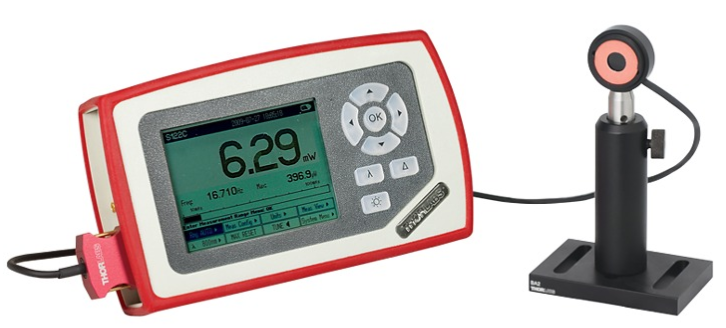

Spectral sensitivity of the Si detector

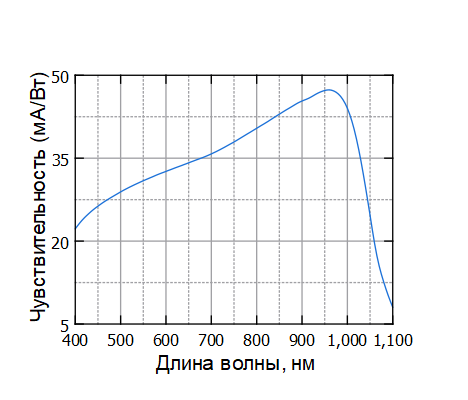



The code below connects the detector (the specific device, since all USB devices have a unique address) and reads the readings from it.

```python
import pyvisa as visa
from ThorlabsPM100 import ThorlabsPM100
address = 'USB0::0x1313::0x8078::P0013429::INSTR'
rm = visa.ResourceManager()
inst = rm.open_resource(address)
power_meter = ThorlabsPM100(inst=inst)
inst.timeout = None
print("Current value :", power_meter.read)
```

Result:

    Current value : 2.57

https://pypi.org/project/ThorlabsPM100/ + "Optical Power Meter Utility"

#### Problem

Write a program to record intensity every 3 seconds for a minute.